In [16]:
from non_cnn.model import FFTModel, get_image_data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [17]:
label2id = {
    "none": 0,
    "bus": 1,
    "car": 2,
    "truck": 3
}

id2label = {label2id[k]: k  for k in label2id}

In [18]:
dirs = [
    'dataset_2_without_txt',
    'dataset/train',
    'dataset/valid',
    'dataset/test_labeled',
    'dataset_3/train',
    'dataset_3/test_labeled',
    'dataset_4',
]

X, y = get_image_data(dirs, label2id)


Count images for none: 250
Count images for bus: 620
Count images for car: 1174
Count images for truck: 541
Total images: 2585


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=421
)

In [20]:
from sklearn.svm import SVC


model = FFTModel(lambda: 
                 SVC(kernel='rbf', C=6, 
                     verbose=True, probability=True)
                )
model.fit(X_train, y_train, id2label=id2label)

[LibSVM]

SVC(C=6, probability=True, verbose=True)

In [21]:
print(model._model)

SVC(C=6, probability=True, verbose=True)


In [22]:
y_pred = model.predict(X_train)

In [23]:
accuracy_score(y_train, y_pred)

0.9863450159308147

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)
# Accuracy: 0.8737113402061856

0.8737113402061856

In [26]:
model.save('models/modelSVC4.pkl')

In [27]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']))

Predicted   0   1    2   3
Actual                    
0          23   6   17   0
1           0  68    3   3
2           2   4  184   3
3           1   2    8  64


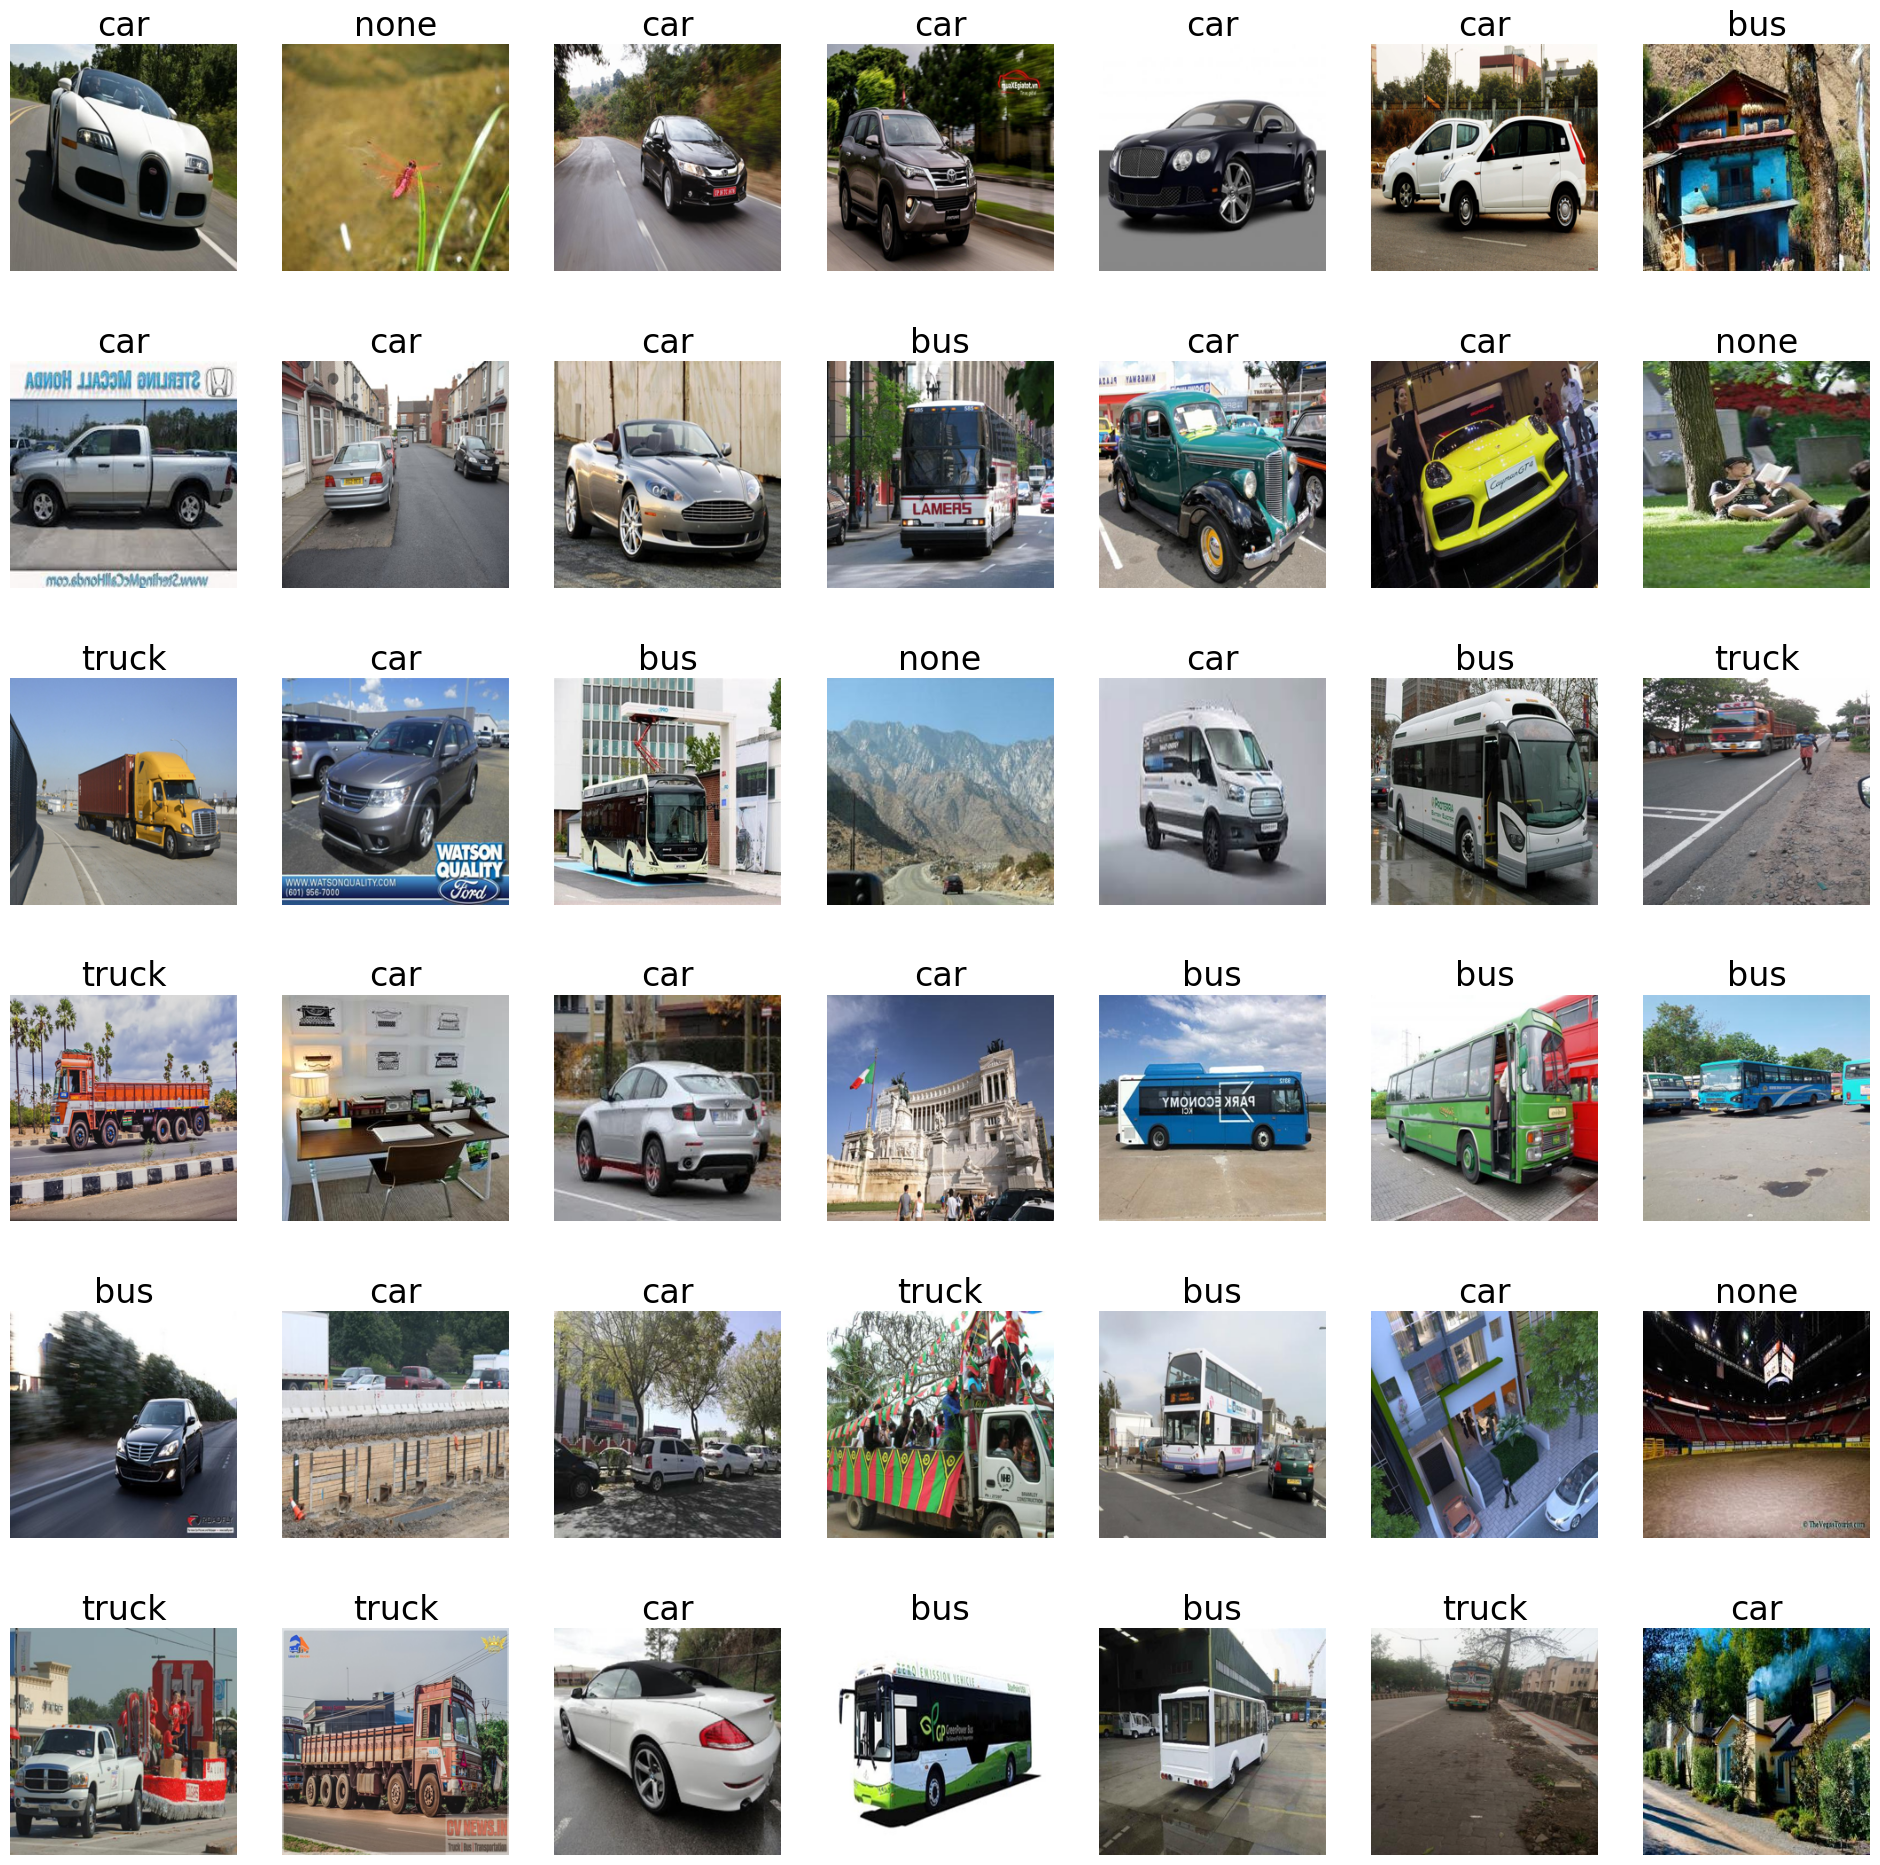

In [37]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(6, 7, figsize=(24, 24))
axs = axs.flatten()
for i in range(42):
    imgplot = axs[i].imshow(X_test[i+220])
    axs[i].set_title(id2label[y_pred[i+220]], fontsize=24)
    axs[i].axis('off')
plt.show()